In [1]:
ord('С')%5

2

In [2]:
from sklearn import neighbors as ne, metrics as me, cluster as cl, datasets as ds, preprocessing as pr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings as fw
fw('ignore')

In [ ]:
def getsil(x,ypred):
    cluster_labels = np.unique(ypred)
    n_clusters  = cluster_labels.shape[0]
    silhouette_values = me.silhouette_samples(x,ypred)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for c in cluster_labels:
        c_silhouette_values = silhouette_values[ypred == c]
        c_silhouette_values.sort()
        y_ax_upper += len(c_silhouette_values)
        color = ['r','g','b',"orange", "lightgreen", "lightblue"][c]  
        plt.barh(range(y_ax_lower, y_ax_upper), 
                c_silhouette_values, 
                height = 1.0, 
                edgecolor='none', color = color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_values)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'k', linestyle = '--')
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Кластер')
    plt.xlabel('Коэффициент силуэта')
    plt.tight_layout()
    plt.show()

# Кластерный анализ

## Сравнение работы алгоритмов кластеризации на синтетических наборах данных

#### Blobs

Визуализируем объекты с исходными метками:

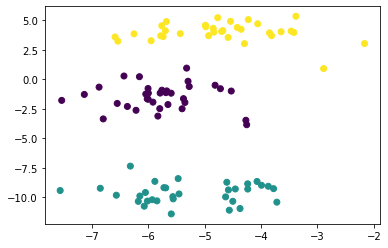

In [ ]:
x,y = ds.make_blobs()
plt.scatter(x=x[:,0], y=x[:,1], c=y)

Кластеризуем с помощью KMeans

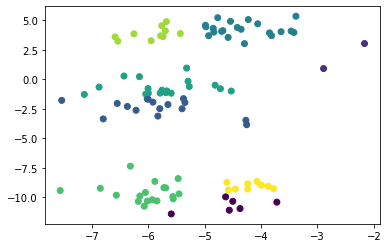

In [ ]:
ypred = cl.KMeans().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

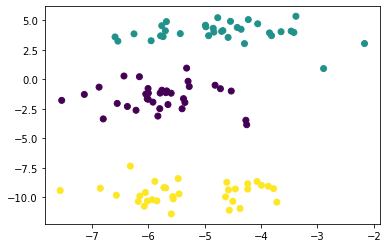

In [ ]:
ypred = cl.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

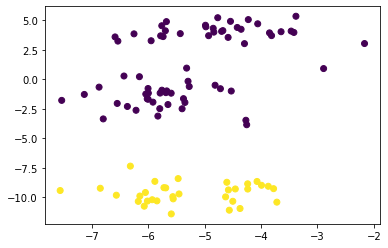

In [ ]:
ypred = cl.AgglomerativeClustering().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

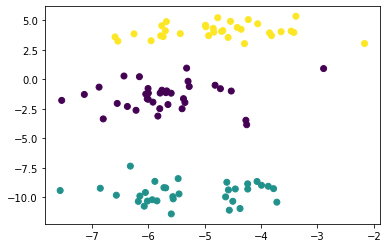

In [ ]:
ypred = cl.AgglomerativeClustering(n_clusters=3).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

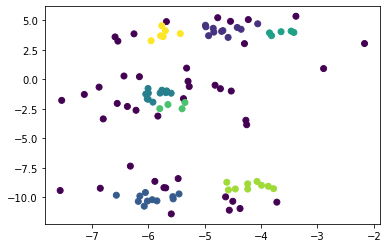

In [ ]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

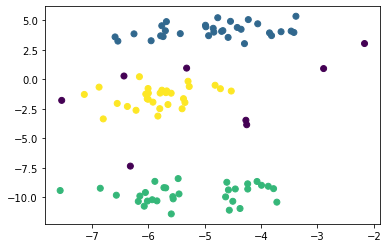

In [ ]:
ypred = cl.DBSCAN(eps=1, min_samples=5).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Moons

Визуализируем объекты с исходными метками:

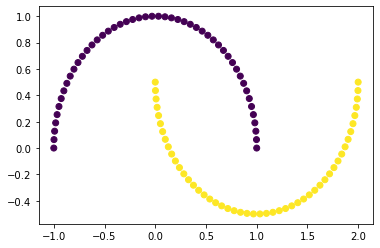

In [3]:
x,y = data = ds.make_moons()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

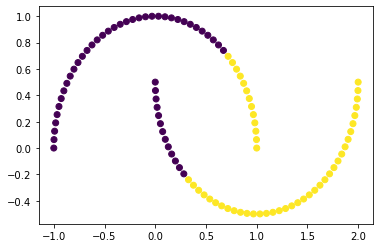

In [4]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

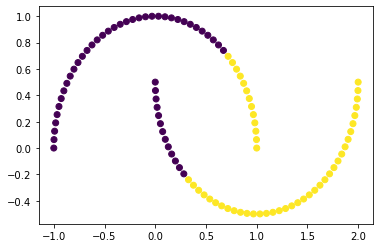

init is k-means++ and algorithm is lloyd


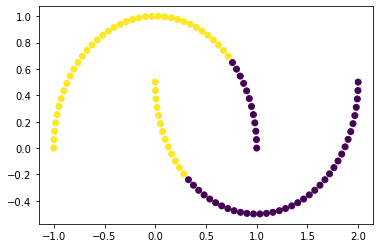

init is k-means++ and algorithm is elkan


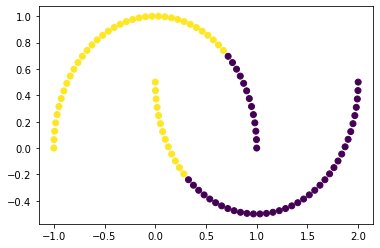

init is random and algorithm is lloyd


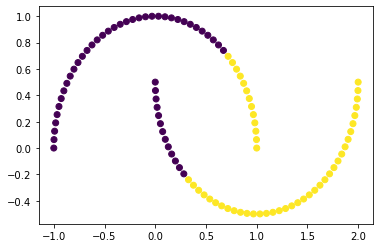

init is random and algorithm is elkan


In [6]:
for init in ['k-means++','random']:
    for algo in ['auto','elkan']:
        ypred = cl.KMeans(n_clusters=2,init=init,algorithm=algo).fit_predict(x)
        plt.scatter(x=x[:,0], y=x[:,1],c=ypred)
        plt.show()
        print('init is {0} and algorithm is {1}'.format(init,algo))

Кластеризуем с помощью AgglomerativeClustering

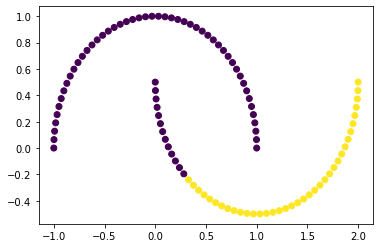

In [ ]:
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

affinity is euclidean and linkage is complete


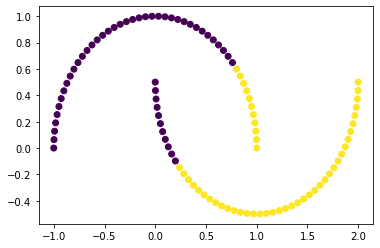

affinity is euclidean and linkage is average


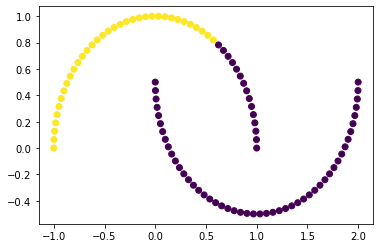

affinity is euclidean and linkage is single


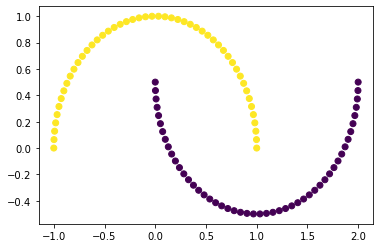

affinity is manhattan and linkage is complete


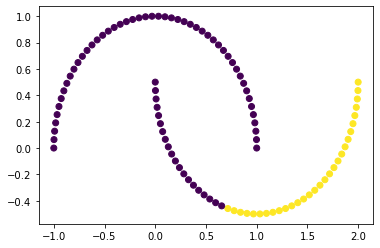

affinity is manhattan and linkage is average


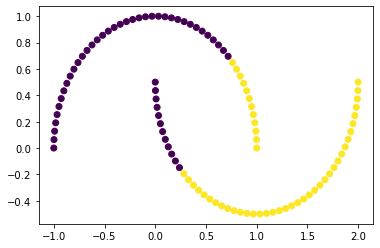

affinity is manhattan and linkage is single


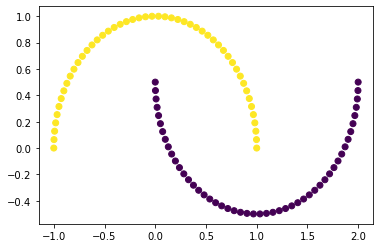

affinity is cosine and linkage is complete


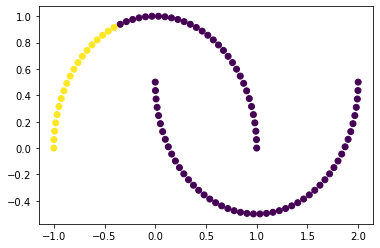

affinity is cosine and linkage is average


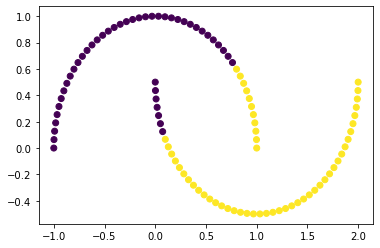

affinity is cosine and linkage is single


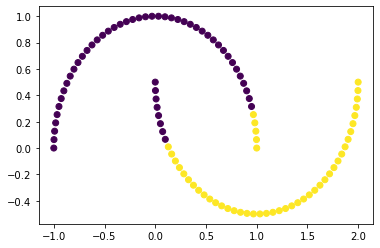

affinity is euclidean and linkage is ward


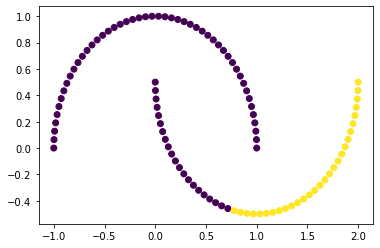

affinity is euclidean and linkage is ward


In [13]:
for aff in ['euclidean','manhattan','cosine']:
    for link in ['complete','average','single']:
        ypred = cl.AgglomerativeClustering(n_clusters=2,linkage=link,affinity=aff).fit_predict(x)
        print('affinity is {0} and linkage is {1}'.format(aff,link))
        plt.scatter(x=x[:,0], y=x[:,1],c=ypred)
        plt.show()

print('affinity is euclidean and linkage is ward')
ypred = cl.AgglomerativeClustering(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)
plt.show()
print('affinity is euclidean and linkage is ward')

Кластеризуем с помощью DBSCAN

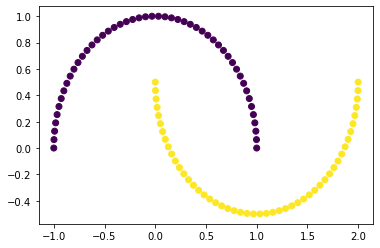

In [ ]:
ypred = cl.DBSCAN().fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

#### Circles

Визуализируем объекты с исходными метками:

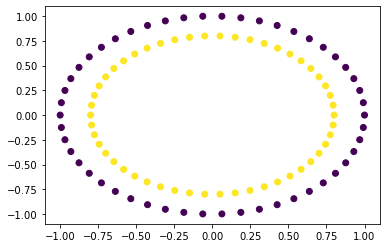

In [15]:
x,y = data = ds.make_circles()
plt.scatter(x=x[:,0], y=x[:,1],c=y)

Кластеризуем с помощью KMeans

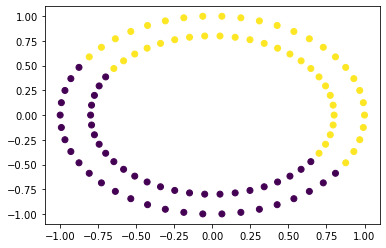

In [ ]:
ypred = cl.KMeans(n_clusters=2).fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью AgglomerativeClustering

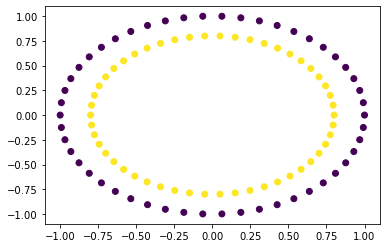

In [16]:
ypred = cl.AgglomerativeClustering(n_clusters=2,linkage='single').fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

Кластеризуем с помощью DBSCAN

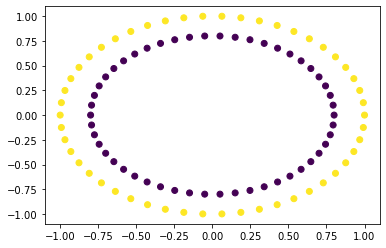

In [ ]:
clust = cl.DBSCAN(eps=0.18, min_samples=3)
ypred = clust.fit_predict(x)
plt.scatter(x=x[:,0], y=x[:,1],c=ypred)

## Кластеризация выбранного набора данных

Все параметры в датасете категориальные, поэтому закодируем буквенные обозначения (метки) в цифровой вид и отделим целевой параметр

In [ ]:
data = pd.read_csv('mushrooms.csv')

LE = pr.LabelEncoder()
for i in data.columns:
    data.loc[:,i] = LE.fit_transform(data.loc[:,i])

x = data.iloc[:,1:]
y = data.iloc[:,:1]

data.shape

(8124, 23)

Рассмотрим различное количество кластеров и оценку силуэтов для каждого

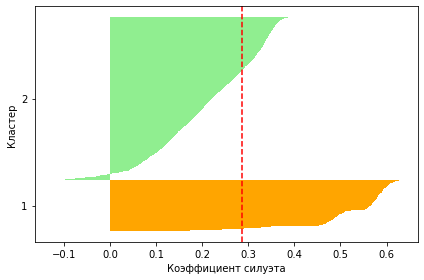

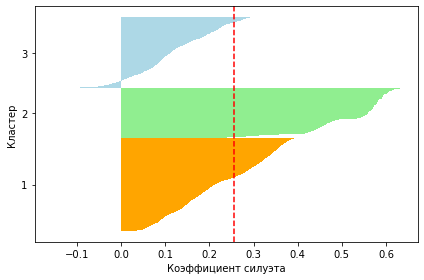

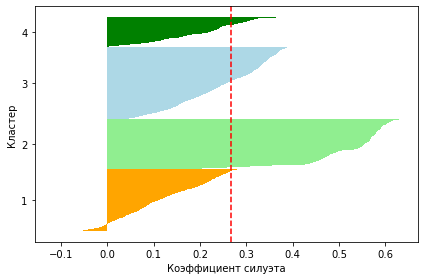

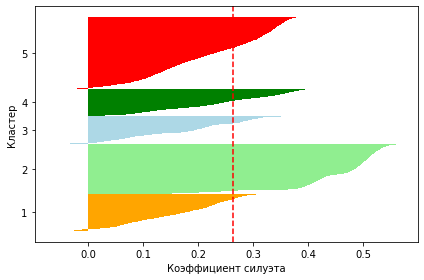

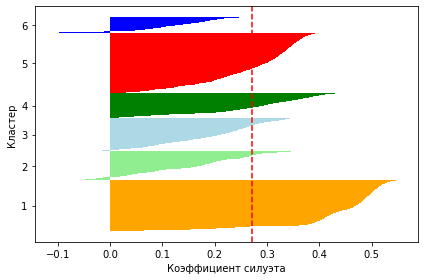

In [ ]:
for i in range(2,7):
    cluster = cl.KMeans(n_clusters=i)
    ypred = cluster.fit_predict(x)
    getsil(x,ypred)

Так как при числе кластеров более 2 силуэт у одного из кластеров будет практически целиком ниже среднего значения, возьмем число кластеров равное 2<br>
(значение силуэта ниже среднего обозначает, что элемент кластера не сильно уж похож на элементы своего кластера)

Кластеризуем с помощью KMeans

In [ ]:
cluster = cl.KMeans(n_clusters=2)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y.iloc[:,0],ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.587319846576028
clusters = {0: 6188, 1: 1936}


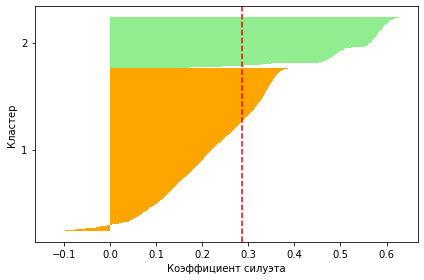

In [ ]:
getsil(x,ypred)

Кластеризуем с помощью AgglomerativeClustering

In [ ]:
cluster = cl.AgglomerativeClustering(n_clusters=2)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y.iloc[:,0],ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.5848671578469219
clusters = {0: 6148, 1: 1976}


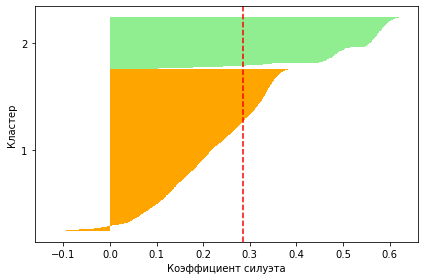

In [ ]:
getsil(x,ypred)

Кластеризуем с помощью DBSCAN

Приблизим параметр epsilon, вычислив расстояния с помощью ближайших соседей, min_samples как 2*кол-во параметров.

(0.975, 1.025)

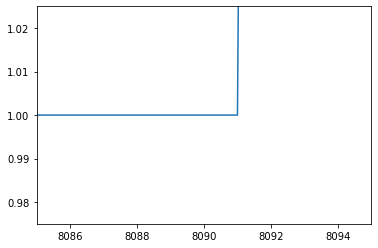

In [ ]:
neighbors = ne.NearestNeighbors(n_neighbors=44)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(8085,8095)
plt.ylim(0.975,1.025)

In [ ]:
cluster = cl.DBSCAN(eps=1.01,min_samples=44)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y.iloc[:,0],ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.5005844714084224
clusters = {-1: 8124}


In [ ]:
cluster = cl.DBSCAN(eps=5,min_samples=10)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y.iloc[:,0],ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.5924628312855771
clusters = {0: 6168, 1: 1824, 2: 96, 3: 36}


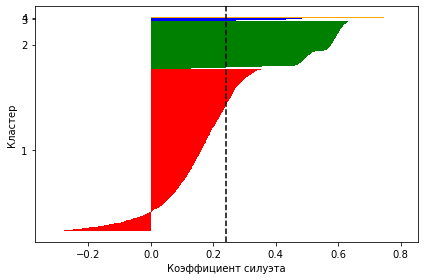

In [ ]:
getsil(x,ypred)

In [ ]:
tmax = 0
for i in [0.99, 1.01, 2, 5, 10, 25, 50, 100]:
    for j in [1, 2, 5, 10, 25, 50, 100]:
        cluster = cl.DBSCAN(eps=i,min_samples=j, n_jobs=-1)
        ypred = cluster.fit_predict(x)
        if(me.cluster.rand_score(y.iloc[:,0],ypred) > tmax):
            tmax = me.cluster.rand_score(y.iloc[:,0],ypred)
            ti = i
            tj = j
print('best rand={0} with eps={1} and min_samples={2}'.format(tmax,ti,tj))

best rand=0.5978689720873912 with eps=5 and min_samples=100


In [ ]:
cluster = cl.DBSCAN(eps=ti,min_samples=tj)
ypred = cluster.fit_predict(x)

print('rand score = {0}'.format(me.cluster.rand_score(y.iloc[:,0],ypred)))
tempu, tempc = np.unique(ypred, return_counts=True)
print('clusters = {0}'.format(dict(zip(tempu,tempc))))

rand score = 0.5978689720873912
clusters = {-1: 353, 0: 6025, 1: 1746}
